In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hw3_avocado.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
unique_values = df.nunique()
print(unique_values)

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64


In [5]:
print(df.head(), df.tail())
print(df.iloc[:, :4], df.iloc[:, -4:])

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [6]:
selected_columns = df[['Date', 'Total Volume', 'type']]

print(selected_columns.head())


         Date  Total Volume          type
0  2015-12-27      64236.62  conventional
1  2015-12-20      54876.98  conventional
2  2015-12-13     118220.22  conventional
3  2015-12-06      78992.15  conventional
4  2015-11-29      51039.60  conventional


In [7]:
average_price_column = df['AveragePrice']

print(average_price_column.head())


0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64


In [8]:
df['EstimatedRevenue'] = df['Total Volume'] * df['AveragePrice']

print(df.head())


   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  EstimatedRevenue  
0  2015  Albany        85434.7046  
1  2015 

In [9]:
grouped_df = df.groupby(['region', 'type'])['AveragePrice'].mean().reset_index()

print(grouped_df.head())


                region          type  AveragePrice
0               Albany  conventional      1.348757
1               Albany       organic      1.773314
2              Atlanta  conventional      1.068817
3              Atlanta       organic      1.607101
4  BaltimoreWashington  conventional      1.344201


<Figure size 1000x600 with 0 Axes>

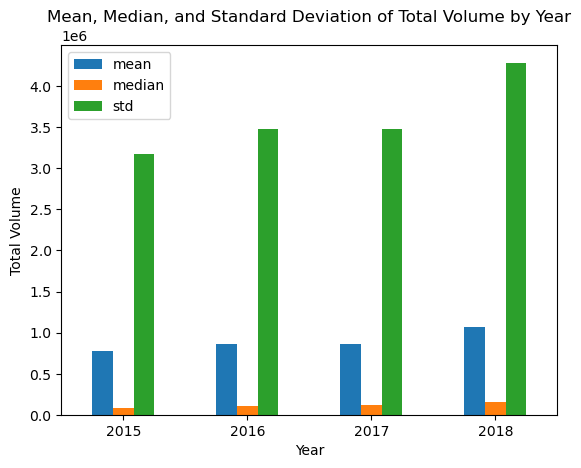

In [10]:
import matplotlib.pyplot as plt

volume_stats = df.groupby('year')['Total Volume'].agg(['mean', 'median', 'std']).reset_index()

plt.figure(figsize=(10, 6))
volume_stats.plot(x='year', y=['mean', 'median', 'std'], kind='bar', rot=0)
plt.title('Mean, Median, and Standard Deviation of Total Volume by Year')
plt.ylabel('Total Volume')
plt.xlabel('Year')
plt.show()


In [11]:
bags_total_df = df.groupby('type')[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().reset_index()

print(bags_total_df)


           type    Small Bags    Large Bags  XLarge Bags
0  conventional  3.164183e+09  9.259030e+08  56678255.60
1       organic  1.606877e+08  6.571281e+07     10921.73


<Figure size 1000x600 with 0 Axes>

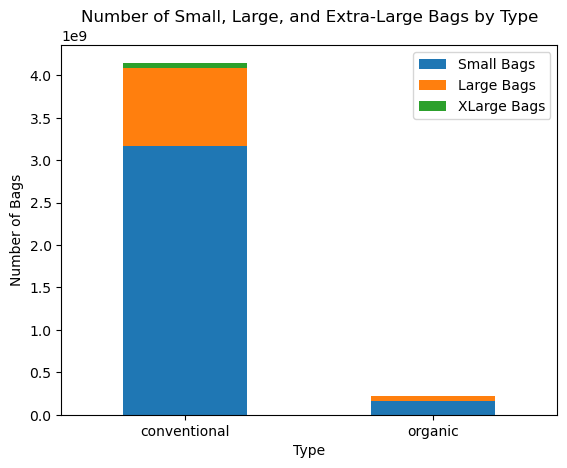

In [12]:
plt.figure(figsize=(10, 6))
bags_total_df.set_index('type').plot(kind='bar', stacked=True, rot=0)
plt.title('Number of Small, Large, and Extra-Large Bags by Type')
plt.ylabel('Number of Bags')
plt.xlabel('Type')
plt.show()


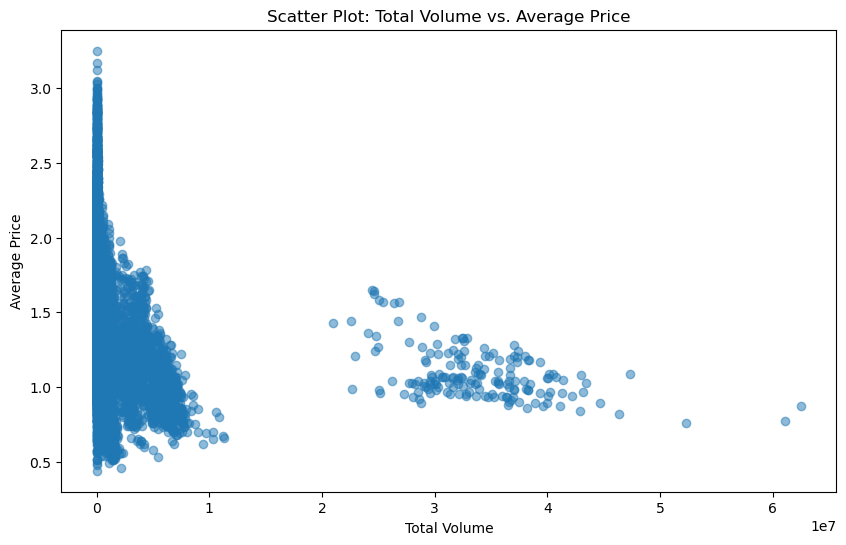

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Volume'], df['AveragePrice'], alpha=0.5)
plt.title('Scatter Plot: Total Volume vs. Average Price')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()
